In [26]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from tools import *
plt.gray()

<Figure size 640x480 with 0 Axes>

In [123]:
frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten2.MOV")

In [353]:
frames = frames[0:200]
img = frames[50][1]

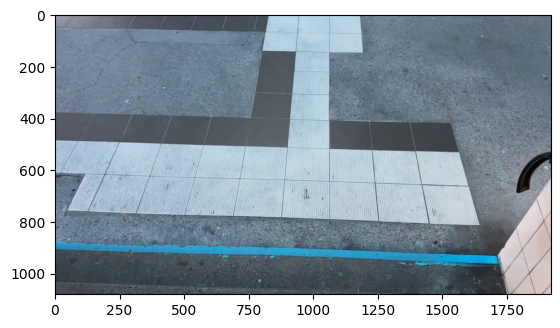

In [354]:
plt.imshow(img)

In [355]:
#make line in the middle of object
img_thresh = thresh_gauss(img)
img_cont = find_max_contour(img_thresh)
# cut image in half 
#cut = 1000
cut = int(4/5 * img.shape[0])
black_up = img_cont[:cut,:]
black_down = img_cont[cut:,:]
#find center of both halfs
c_black_up, koords_up = find_center_plot(black_up)
c_black_down, koords_down = find_center_plot(black_down)
# concatenate both halfs
c_new = np.concatenate((c_black_up, c_black_down))
# make line through middle 
koords = calc_line_koords(koords_up[0], koords_up[1], koords_down[0], koords_down[1]+cut, [0,img.shape[0]])
img_line = cv2.line(c_new, koords[0], koords[1], [0,0,0], 20)

ZeroDivisionError: float division by zero

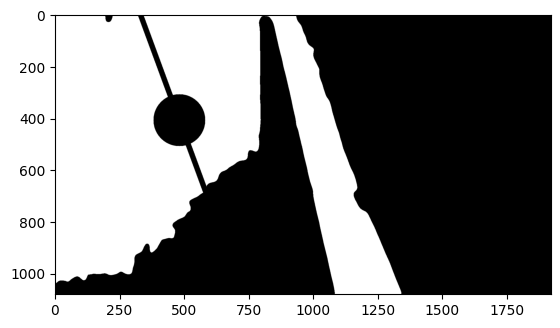

In [352]:
plt.imshow(img_line)

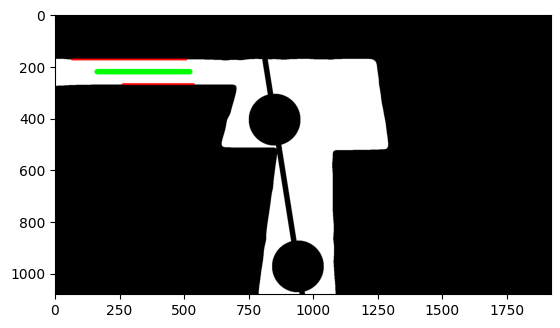

In [347]:
canny = cv2.Canny(img_line, 0, 0)
plt.imshow(canny)
linesh = cv2.HoughLinesP(canny, 1, np.pi/180, 100,
                        minLineLength=200, maxLineGap=50)

lines=np.squeeze(linesh)
black_new = cv2.merge((img_line, img_line, img_line))
#black = np.zeros(np.shape(img),dtype='uint8')
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(y1-y2) < 50:
        cv2.line(black_new, (x1,y1), (x2,y2), (255,0,0),5)
plt.imshow(black_new)
len(lines)

x11 = []
x22 = []
y11 = []
y22 = []
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(x1-x2) > 200:
        x11.append(x1)
        x22.append(x2)
        y11.append(y1)
        y22.append(y2)
x11 = np.array(x11)
y11 = np.array(y11)
x22 = np.array(x22)
y22 = np.array(y22)
#dont plot if no horizontal line 
if len(x11) > 1: 
    cv2.line(black_new, (int(x11.mean()),int(y11.mean())), (int(x22.mean()), int(y22.mean())), (0,255,0), 20)
plt.imshow(black_new)
h_line = [int(x11.mean()),int(y11.mean()), int(x22.mean()), int(y22.mean())]


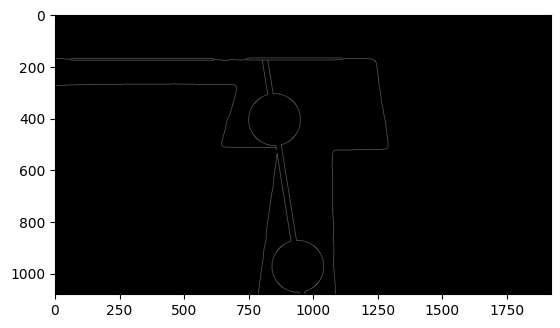

In [338]:
canny = cv2.Canny(black_new, 0, 0)
plt.imshow(canny)

In [344]:
horizontal_lines = []
x11 = []
x22 = []
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(y1-y2) < 50:
        horizontal_lines.append([x1,y1,x2,y2])
# h_lines = np.array(horizontal_lines).flatten()[0::4]
# h_lines
horizontal_lines

[[64, 175, 507, 175], [261, 270, 536, 270]]

In [ ]:
# find longest line vertical 
diffx = []
for (x1,_,x2,_) in lines:
    diffx.append(x2-x1)
llinex = lines[diffx.index(max(diffx))]

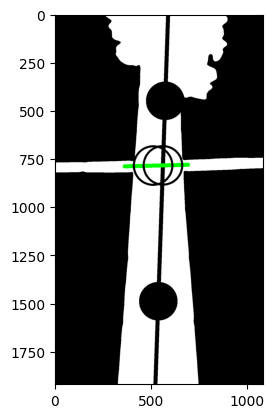

In [108]:
#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
llinex = [int(x11.mean()),int(y11.mean()), int(x22.mean()), int(y22.mean())]
l2 = [koords[0][0], koords[0][1], koords[1][0], koords[1][1]]
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img_line.shape
px=[]
py=[]
for x in range(-50,50,50):
    p=find_intersection(llinex,l2,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    #blank = cv2.circle(black_new, (px[x].astype('int'), py[x].astype('int')),100, [255,255,255], cv2.FILLED)
    blank = cv2.circle(black_new, (int(px[x]), int(py[x])),100, [0,0,0], 10)
plt.imshow(blank)

In [111]:
#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] > 0: 
    print("go right")
if len(px) >= 2:
    print("you can go left or right") 

go left
you can go left or right
